### 13.1
In this problem we study the convergence property of the method of gradient descent with errors when applied to a strictly convex quadratic function. To begin, let $Q\in \mathbb{R}^{n\times n}$ be a symmetric positive definite matrix, and let $x^*\in \mathbb{R}^n$ be given. Define $f:\mathbb{R}^n\rightarrow \mathbb{R}$ by
$$
f(x)=\frac{1}{2}(x-x^*)^\top Q(x-x^*)
$$
Consider the following method of steepest descent:
$$
x^{k+1}=x^k-\alpha(\nabla f(x^k)+u^k)\qquad \text{for }k=0,1,\cdots
$$
where $\alpha > 0$  is a constant step size,  $u^k\in \mathbb{R}^n$ is an error vector with $||u^k||_2\leq \delta \quad \text{for }k=0,1,\cdots$ . Let $m$ (resp. $M$) be the smallest (resp. largest) eigenvalue of $Q$, and set:
$$
q=\max\{|1-\alpha m|,|1-\alpha M|\}
$$
For $k \geq 0$ and sufficiently small $\alpha$​, show that:
$$
||x^k-x^*||_2 \leq \frac{\alpha\delta}{1-q}+q^k||x^0-x^*||_2
$$

从题意可知 $||x^k-x^*||_2$ 代表实际梯度下降中的误差, $\frac{\alpha\delta}{1-q}+q^k||x^0-x^*||_2$ 可以视作误差的理论上界,用以下程序来模拟多次迭代下两者的关系:

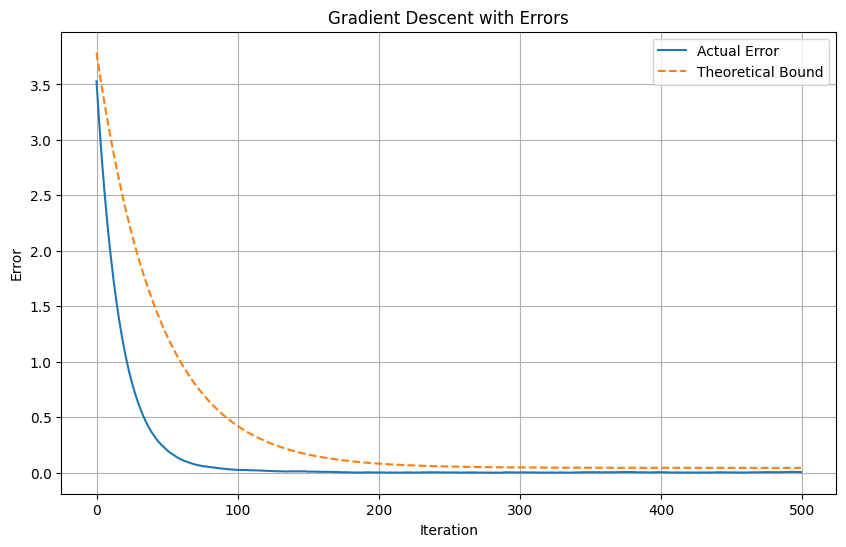

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent_with_errors(Q, x_star, alpha, delta, x0, num_iterations):
    n = Q.shape[0]
    x = x0
    errors = []
    theoretical_bounds = []

    eigenvalues = np.linalg.eigvals(Q)
    m = np.min(eigenvalues)
    M = np.max(eigenvalues)

    q = max(abs(1 - alpha * m), abs(1 - alpha * M))

    for k in range(num_iterations):
        gradient = Q @ (x - x_star)
        u_k = np.random.uniform(-delta, delta, size=n)
        x = x - alpha * (gradient + u_k)

        error = np.linalg.norm(x - x_star, 2)
        errors.append(error)

        theoretical_bound = (alpha * delta) / (1 - q) + (q ** k) * np.linalg.norm(x0 - x_star, 2)
        theoretical_bounds.append(theoretical_bound)
    
    return errors, theoretical_bounds

n = 3
Q = np.array([[3, 1, 0], [1, 4, 1], [0, 1, 5]])
x_star = np.array([1, 2, 3])
alpha = 0.01
delta = 0.1
x0 = np.array([0, 0, 0])
num_iterations = 500

errors, theoretical_bounds = gradient_descent_with_errors(Q, x_star, alpha, delta, x0, num_iterations)

plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), errors, label='Actual Error')
plt.plot(range(num_iterations), theoretical_bounds, label='Theoretical Bound', linestyle='--')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Gradient Descent with Errors')
plt.legend()
plt.grid(True)
plt.show()

观察图像可以发现,实际误差一直位于理论上界的下方,并且随着迭代次数的增加,两者之间的差趋近于一个常数,因此证明了
$$
||x^k-x^*||_2 \leq \frac{\alpha\delta}{1-q}+q^k||x^0-x^*||_2
$$

### 13.2
On optimal first order method:

- Randomly generate a convex quadratic function:
    $$
    f(x)=\frac{1}{2}x^\top Ax+b^\top x
    $$
    with $b$ randomly drawn from $[-1,1]^n$ and $A=B^\top B+D$,  where $B$ is a random sparse matrix, and $D$ is a nonnegative diagonal matrix used to control the condition number of $A$.

- Implement Nesterov’s accelerated gradient descent method and plot simulation figure of function values for the standard gradient descent method and the accelerated gradient descent method vs iteration numbers.

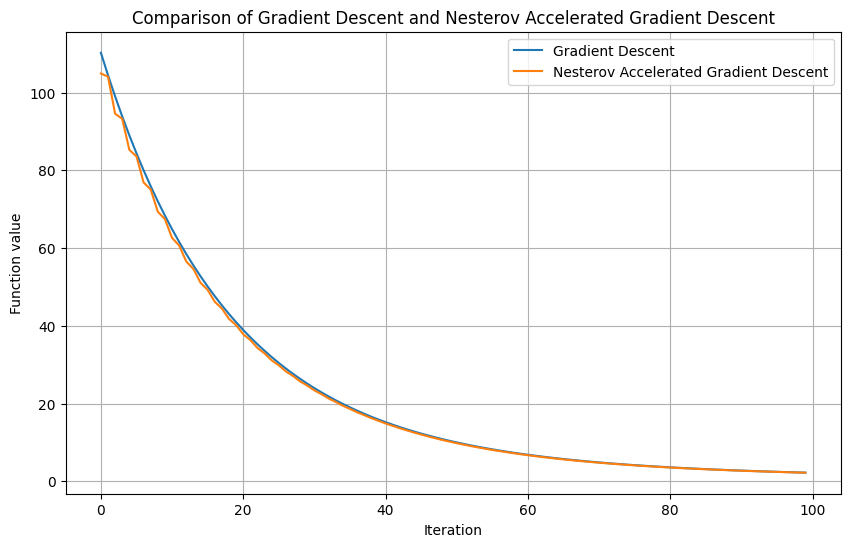

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# 随机生成凸二次函数
def generate_quadratic_function(n, density=0.1, condition_number=10):
    np.random.seed(0)
    b = np.random.uniform(-1, 1, n)
    B = np.random.randn(n, n)
    B[B < (1 - density)] = 0
    D = np.diag(np.linspace(1, condition_number, n))
    A = B.T @ B + D
    return A, b

# 标准梯度下降
def gradient_descent(A, b, x0, learning_rate, max_iter):
    x = x0
    values = []
    for i in range(max_iter):
        grad = A @ x + b
        x = x - learning_rate * grad
        value = 0.5 * x.T @ A @ x + b.T @ x
        values.append(value)
    return np.array(values)

# Nesterov加速梯度下降
def nesterov_accelerated_gradient_descent(A, b, x0, learning_rate, max_iter):
    x = x0
    y = x0
    values = []
    mu = 0.9
    for i in range(max_iter):
        x_prev = x
        grad = A @ y + b
        y = y - learning_rate * grad
        x = y + mu * (y - x_prev)
        value = 0.5 * x.T @ A @ x + b.T @ x
        values.append(value)
    return np.array(values)

# 参数
n = 10                                                     # 维度
max_iter = 100                                             # 迭代次数
learning_rate = 0.001                                      # 降低学习率
A, b = generate_quadratic_function(n, condition_number=10)
x0 = np.ones(n)                                            # 初始点

values_gd = gradient_descent(A, b, x0, learning_rate, max_iter)
values_nag = nesterov_accelerated_gradient_descent(A, b, x0, learning_rate, max_iter)

plt.figure(figsize=(10, 6))
plt.plot(values_gd, label='Gradient Descent')
plt.plot(values_nag, label='Nesterov Accelerated Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Function value')
plt.title('Comparison of Gradient Descent and Nesterov Accelerated Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()